In [1]:
import pandas as pd
import numpy as np

# This line tells the notebook to show plots inside of the notebook
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sb

article_data = pd.read_csv("data/texts.csv", sep=',')

article_data.head()

,TextID,URL,Label,totalWordsCount,semanticobjscore,semanticsubjscore,CC,CD,DT,EX,...,pronouns2nd,pronouns3rd,compsupadjadv,past,imperative,present3rd,present1st2nd,sentence1st,sentencelast,txtcomplexity;;
0,Text0001,http://msn.foxsports.com/foxsoccer/mexico/stor...,objective,109.0,0.0,1.0,7.0,9.0,0.0,5.0,...,0.0,3.0,0.0,11.0,0.0,0.0,0.0,0.0,1.0,18;;
1,Text0002,http://msn.foxsports.com/foxsoccer/premierleag...,objective,309.0,21.0,4.0,1.0,19.0,1.0,4.0,...,0.0,10.0,0.0,13.0,0.0,14.0,9.0,1.0,1.0,14;;
2,Text0003,http://uk.eurosport.yahoo.com/04022011/58/fed-...,objective,149.0,6.0,1.0,8.0,14.0,0.0,5.0,...,0.0,2.0,0.0,8.0,0.0,3.0,2.0,1.0,1.0,18;;
3,Text0004,http://uk.eurosport.yahoo.com/07022011/58/bund...,objective,305.0,18.0,5.0,7.0,26.0,0.0,10.0,...,0.0,8.0,3.0,13.0,1.0,7.0,1.0,1.0,1.0,20;;
4,Text0005,http://uk.eurosport.yahoo.com/05022011/58/fed-...,objective,491.0,23.0,8.0,33.0,47.0,0.0,12.0,...,0.0,16.0,2.0,34.0,1.0,5.0,6.0,1.0,1.0,24;;


In [2]:
article_data.describe()

,totalWordsCount,semanticobjscore,semanticsubjscore,CC,CD,DT,EX,FW,INs,JJ,...,pronouns1st,pronouns2nd,pronouns3rd,compsupadjadv,past,imperative,present3rd,present1st2nd,sentence1st,sentencelast
count,993.000000,993.000000,993.000000,993.000000,993.000000,993.000000,993.000000,993.000000,993.000000,993.000000,...,993.000000,993.000000,993.000000,993.000000,993.000000,993.000000,993.000000,993.000000,993.000000,993.000000
mean,694.370594,38.810675,13.843907,20.538771,66.202417,1.046324,11.369587,74.752266,47.269889,2.132931,...,4.322256,2.688822,19.093656,5.389728,29.918429,4.349446,17.019134,11.805639,0.927492,0.994965
std,522.118710,32.060622,13.545949,22.696782,51.956638,1.655839,12.572746,55.602773,38.370746,2.818153,...,6.605905,4.816057,16.694549,5.752644,25.288903,5.098796,17.739849,12.269056,0.259457,0.070816
min,47.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,2.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,270.000000,13.000000,4.000000,7.000000,24.000000,0.000000,3.000000,31.000000,19.000000,0.000000,...,0.000000,0.000000,6.000000,1.000000,11.000000,1.000000,4.000000,3.000000,1.000000,1.000000
50%,624.000000,33.000000,10.000000,14.000000,57.000000,0.000000,8.000000,67.000000,40.000000,1.000000,...,2.000000,1.000000,14.000000,4.000000,24.000000,3.000000,11.000000,8.000000,1.000000,1.000000
75%,950.000000,56.000000,20.000000,26.000000,93.000000,1.000000,15.000000,102.000000,65.000000,3.000000,...,6.000000,3.000000,28.000000,8.000000,44.000000,6.000000,25.000000,18.000000,1.000000,1.000000
max,4283.000000,237.000000,97.000000,225.000000,471.000000,12.000000,96.000000,473.000000,354.000000,26.000000,...,80.000000,44.000000,127.000000,39.000000,220.000000,31.000000,142.000000,97.000000,1.000000,1.000000


In [3]:
# This line tells the notebook to show plots inside of the notebook
#article_data.corr()[Label]

print(article_data.columns)

Index(['TextID', 'URL', 'Label', 'totalWordsCount', 'semanticobjscore',
       'semanticsubjscore', 'CC', 'CD', 'DT', 'EX', 'FW', 'INs', 'JJ', 'JJR',
       'JJS', 'LS', 'MD', 'NN', 'NNP', 'NNPS', 'NNS', 'PDT', 'POS', 'PRP',
       'PRP$', 'RB', 'RBR', 'RBS', 'RP', 'SYM', 'TOs', 'UH', 'VB', 'VBD',
       'VBG', 'VBN', 'VBP', 'VBZ', 'WDT', 'WP', 'WP$', 'WRB', 'baseform',
       'Quotes', 'questionmarks', 'exclamationmarks', 'fullstops', 'commas',
       'semicolon', 'colon', 'ellipsis', 'pronouns1st', 'pronouns2nd',
       'pronouns3rd', 'compsupadjadv', 'past', 'imperative', 'present3rd',
       'present1st2nd', 'sentence1st', 'sentencelast', 'txtcomplexity;;'],
      dtype='object')


In [55]:
# Filtered the dataframe to delete URL column and clean txtcomplexity column name and ent
flt_article_data = article_data.drop(columns=['URL']) 
flt_article_data = flt_article_data.rename(columns={'txtcomplexity;;':'txtcomplexity'})
flt_article_data['txtcomplexity'] = flt_article_data['txtcomplexity'].str.replace(';;', '')
flt_article_data['txtcomplexity'] = flt_article_data['txtcomplexity'].str.replace(';', '')

KeyboardInterrupt: 

In [56]:
flt_article_data['txtcomplexity'] = flt_article_data['txtcomplexity'].fillna(-1).astype(int)
flt_article_data = flt_article_data.replace({-1:np.nan})


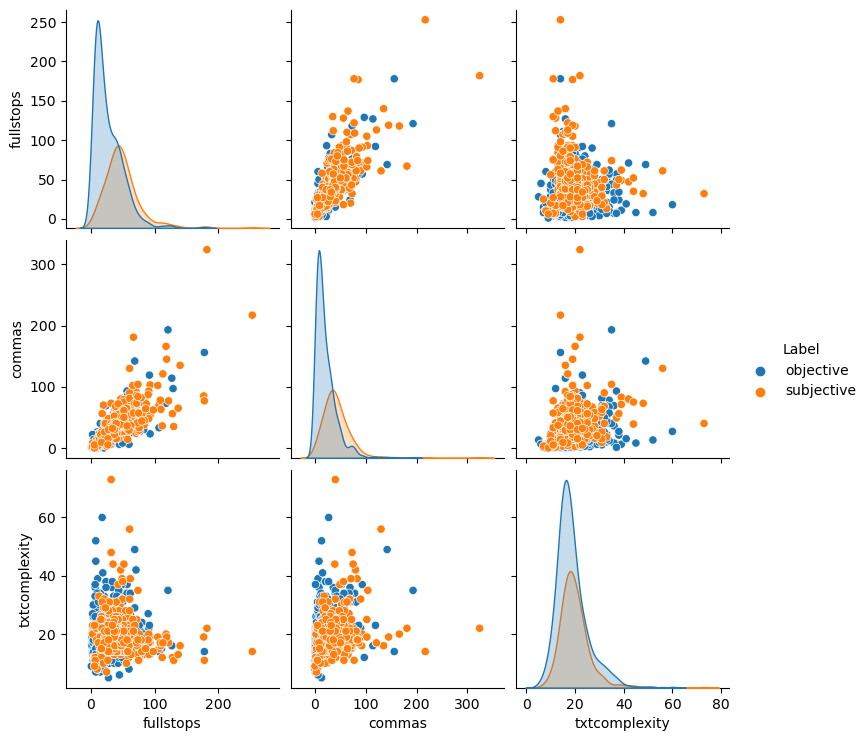

In [58]:
sb.pairplot(flt_article_data.loc[:,['TextID', 'Label', 'fullstops', 'commas','txtcomplexity']], hue='Label')

In [ ]:
# separate labels from data

article_data.drop('URL', axis=1)

indicators = article_data.drop('Label', axis=1)
labels = article_data['Label']

In [ ]:
if article_data.isnull().any().any():
    print('Missing values')
else:
    print('No Missing values')

In [ ]:
null_mask = article_data.isnull().any(axis=1)
null_rows = article_data[null_mask]
null_rows

In [ ]:
indicators.shape